In [3]:
# Notebook Size

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

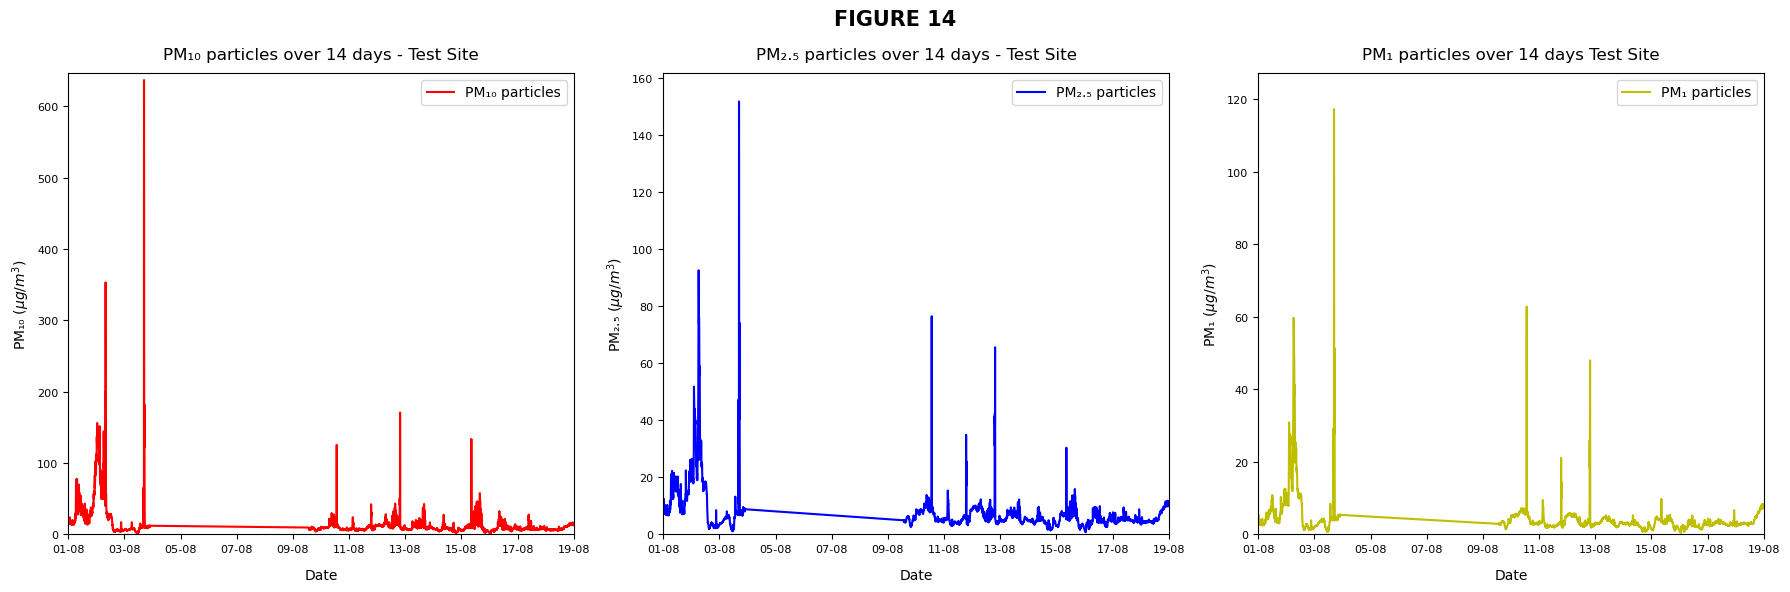

In [2]:
folder_path = '/Users/ahmad/Documents/NERC Internship/Data/Excel/Actual Data/Dust/Test Site'

all_dfs = []

# Loop through all files in the directory
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_excel(file_path, engine='openpyxl')
        df['Date Time'] = pd.to_datetime(df['Date Time'], dayfirst=True, errors='coerce')
        all_dfs.append(df)

combined_df = pd.concat(all_dfs)

# Drop rows with invalid dates and remove duplicates
combined_df = combined_df.dropna(subset=['Date Time'])
combined_df = combined_df.drop_duplicates(subset=['Date Time'])

combined_df = combined_df.sort_values(by='Date Time')

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# PM10
axs[0].plot(combined_df['Date Time'], combined_df['PM10 particles (ug/m^3)'], label='PM₁₀ particles', color="r")
axs[0].set_title('PM₁₀ particles over 14 days - Test Site', fontsize=12, pad=10)
axs[0].set_xlabel('Date', fontsize=10, labelpad=10)
axs[0].set_ylabel('PM₁₀ ($μg/m^{3}$)', fontsize=10)
axs[0].legend(fontsize=10)
axs[0].tick_params(axis='both', which='major', labelsize=8)
axs[0].set_xlim(combined_df['Date Time'].min(), combined_df['Date Time'].min() + pd.Timedelta(days=18))
axs[0].set_ylim(0, combined_df['PM10 particles (ug/m^3)'].max() + 10)
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=2))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# PM2.5
axs[1].plot(combined_df['Date Time'], combined_df['PM2.5 particles (ug/m^3)'], label='PM₂.₅ particles', color="b")
axs[1].set_title('PM₂.₅ particles over 14 days - Test Site', fontsize=12, pad=10)
axs[1].set_xlabel('Date', fontsize=10, labelpad=10)
axs[1].set_ylabel('PM₂.₅ ($μg/m^{3}$)', fontsize=10)
axs[1].legend(fontsize=10)
axs[1].tick_params(axis='both', which='major', labelsize=8)
axs[1].set_xlim(combined_df['Date Time'].min(), combined_df['Date Time'].min() + pd.Timedelta(days=18))
axs[1].set_ylim(0, combined_df['PM2.5 particles (ug/m^3)'].max() + 10)
axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=2))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# PM1
axs[2].plot(combined_df['Date Time'], combined_df['PM1 particles (ug/m^3)'], label='PM₁ particles', color="y")
axs[2].set_title('PM₁ particles over 14 days Test Site', fontsize=12, pad=10)
axs[2].set_xlabel('Date', fontsize=10, labelpad=10)
axs[2].set_ylabel('PM₁ ($μg/m^{3}$)', fontsize=10)
axs[2].legend(fontsize=10)
axs[2].tick_params(axis='both', which='major', labelsize=8)
axs[2].set_xlim(combined_df['Date Time'].min(), combined_df['Date Time'].min() + pd.Timedelta(days=18))
axs[2].set_ylim(0, combined_df['PM1 particles (ug/m^3)'].max() + 10)
axs[2].xaxis.set_major_locator(mdates.DayLocator(interval=2))
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

plt.suptitle('FIGURE 14', fontweight='bold', fontsize=15,x=0.5, y=0.98)

plt.tight_layout()

plt.savefig('/Users/ahmad/Pictures/NERC/Figures/Figure_14', dpi=300)

plt.show()